# we have data from people with heart deseases and without 
## our goal is to analyse them, and create a model that can predict if a person have a heart deasease or not 

# import the libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
## ingore warnings 
import warnings 

warnings.filterwarnings("ignore")

In [3]:
#import the dataset 

data = pd.read_csv('heart.csv')
data.columns = [col.lower().replace(' ','_') for col in data.columns]


In [4]:
data.head(5)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## general info

In [5]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### we dont have null values 

# Check for duplicates

In [8]:
data.duplicated().sum()

1

In [9]:
data.loc[data.duplicated(keep='first')]

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
data.loc[data.duplicated(keep='last')]

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### we have one duplicated value , its not impossisle that we could have two peoples with the same features , but because the one row came after the other we will consider it a mistake and we will drop one 

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(302, 14)

# distributions 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

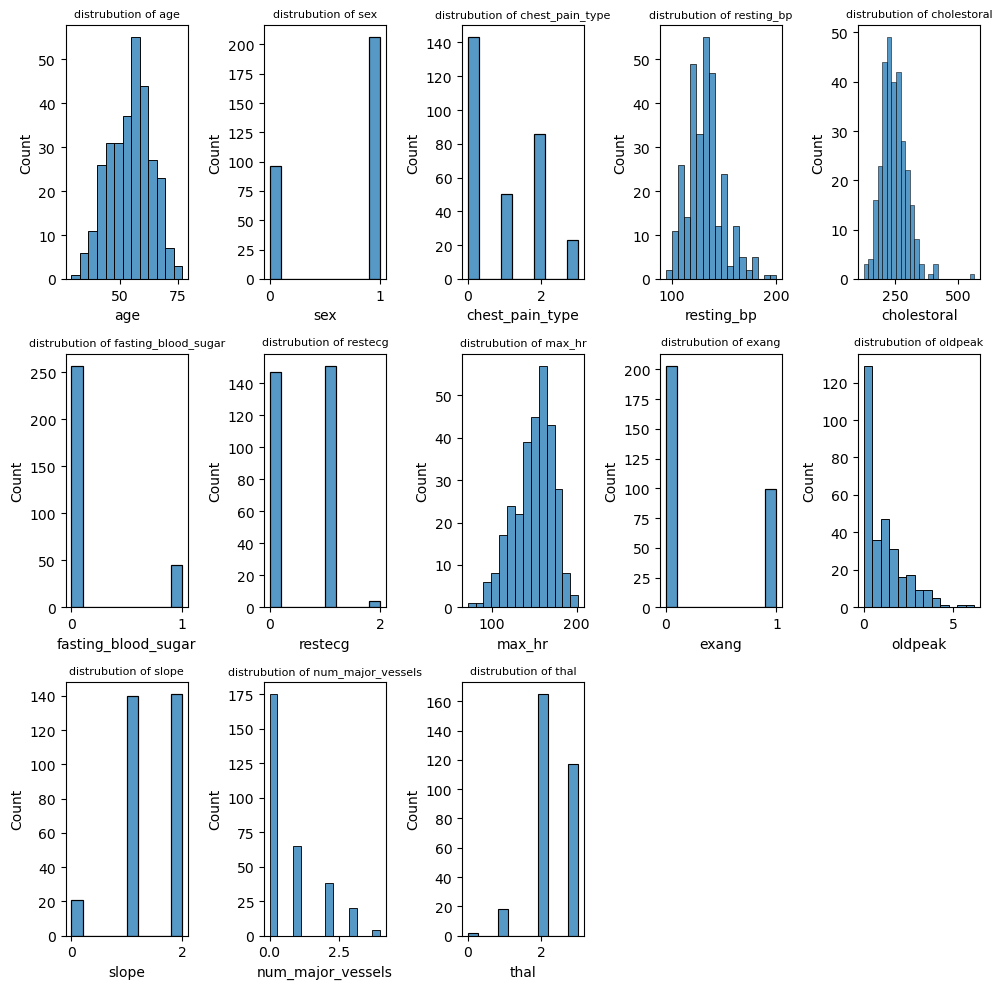

In [14]:
columns = data.drop(columns=['target']).columns
columns = [i for i in columns]


plt.figure(figsize=(10,10))
for column in columns:
    plt.subplot(3,5,columns.index(column)+1)
    sns.histplot(data[column])
    plt.title(f'distrubution of {column}',fontsize=8)
plt.tight_layout()
plt.show()


# distributions with clases

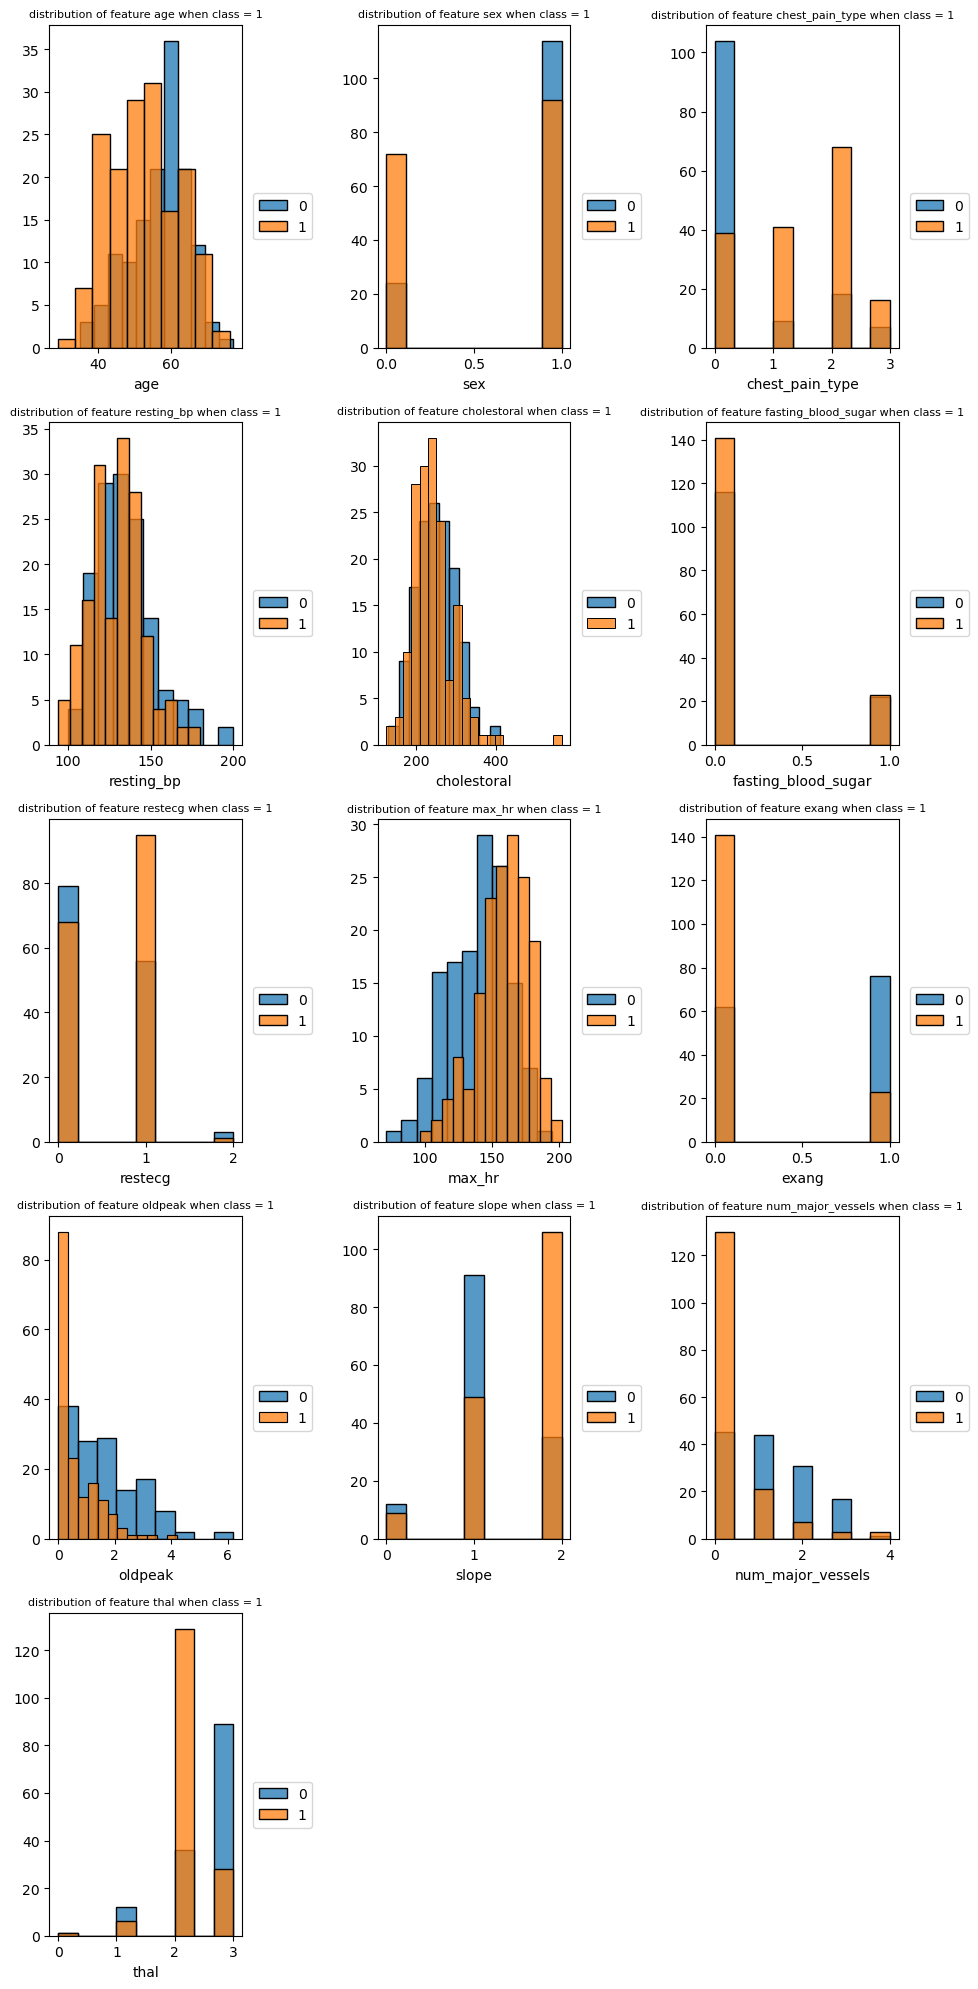

In [15]:
plt.figure(figsize=(10,20))
for column in columns:
    plt.subplot(5,3,columns.index(column)+1)
    for i in range(0,2):
        sns.histplot(data.loc[data['target'] == i,column],label=str(i))
        plt.title(f'distribution of feature {column} when class = {i}',fontsize=8)
        plt.ylabel('')
        plt.legend(bbox_to_anchor=(1.4, 0.5))
plt.tight_layout()
plt.show()

# OUTLIERS 

In [16]:
columns = data.drop(columns=['target']).columns
columns = [i for i in columns]
size = len(columns)
print(f'total columns without target = {size}')

total columns without target = 13


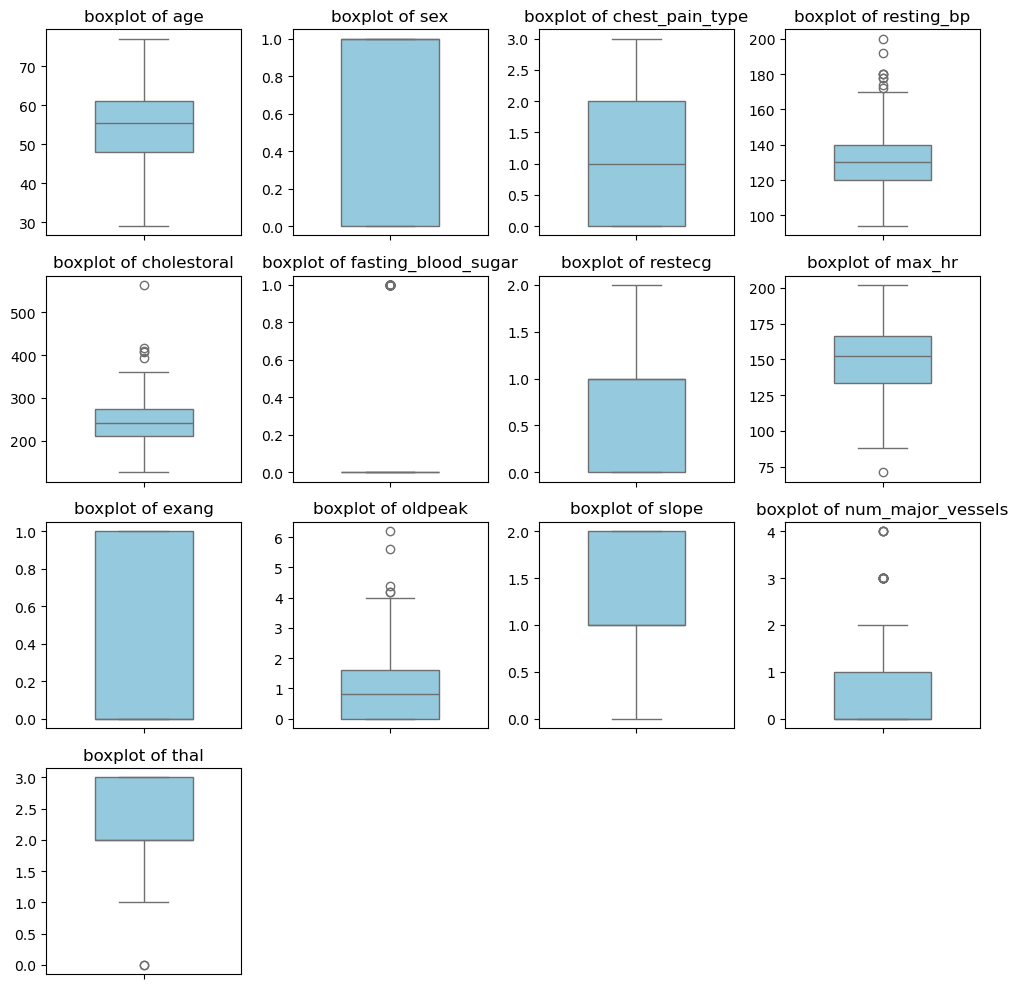

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for column in columns:
    plt.subplot(4,4,columns.index(column)+1)
    sns.boxplot(data=data,y=column,color='skyblue',width=0.5)
    plt.title(f'boxplot of {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## outliers per class 

<Figure size 500x500 with 0 Axes>

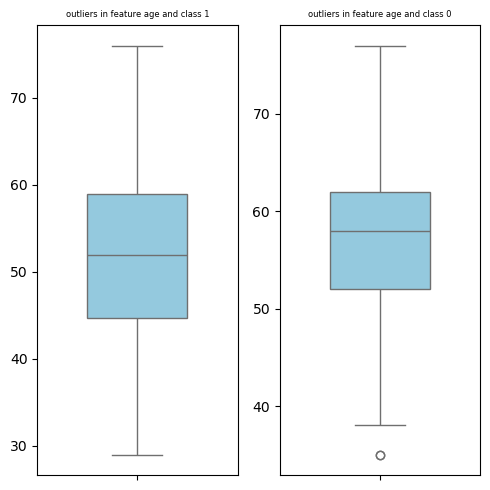

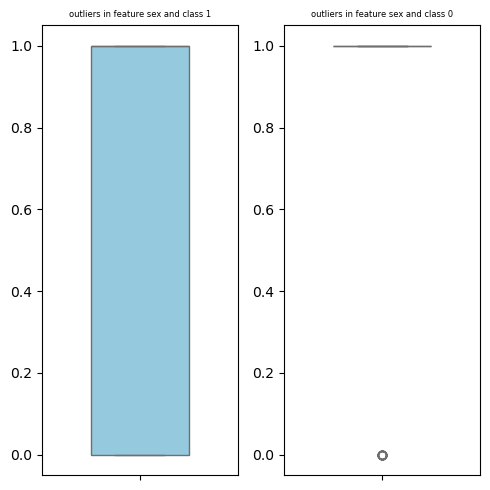

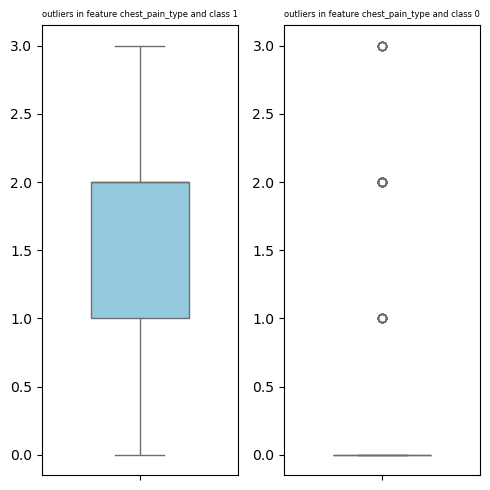

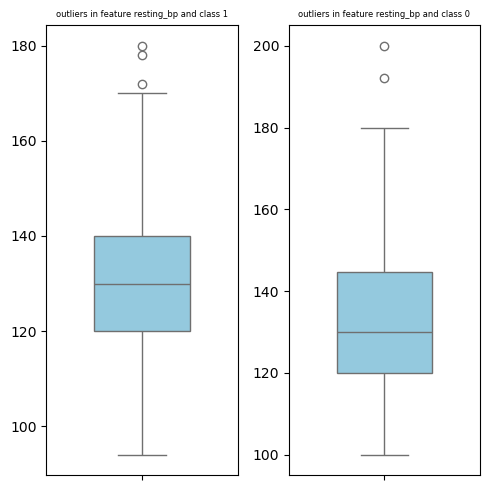

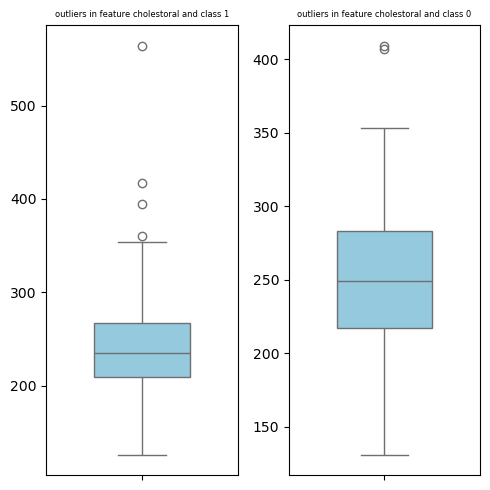

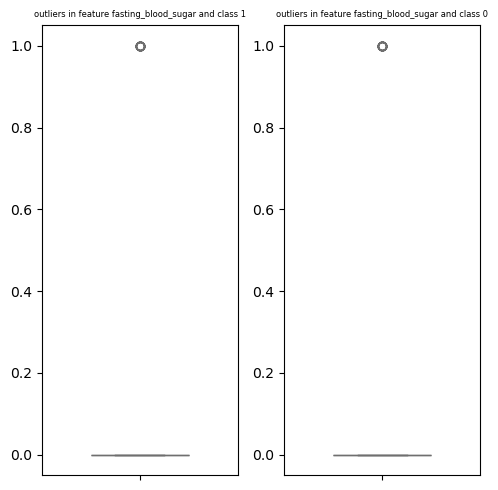

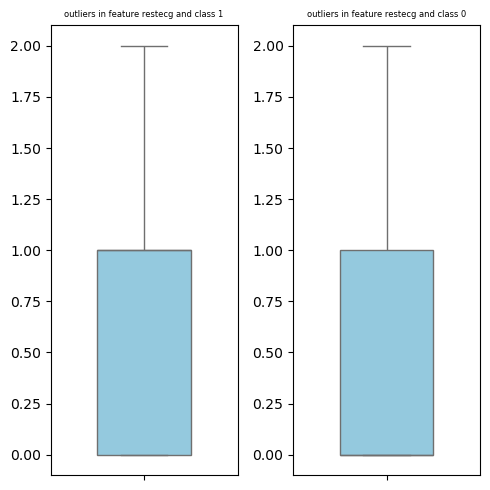

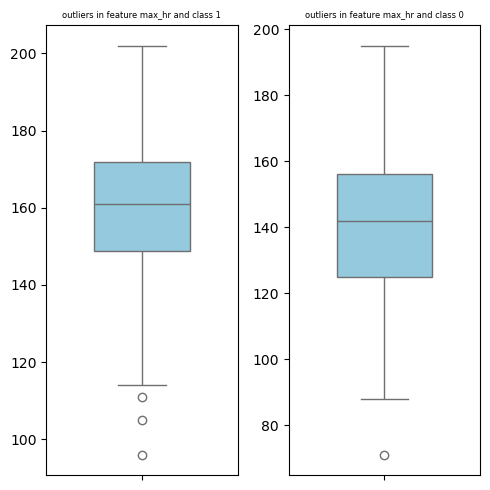

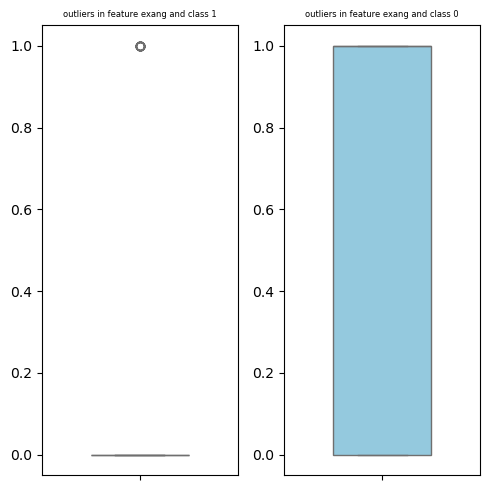

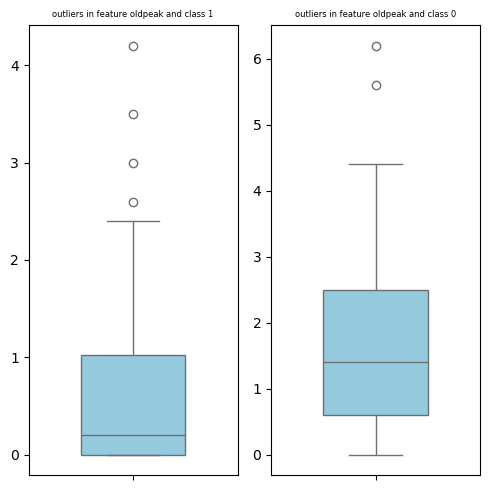

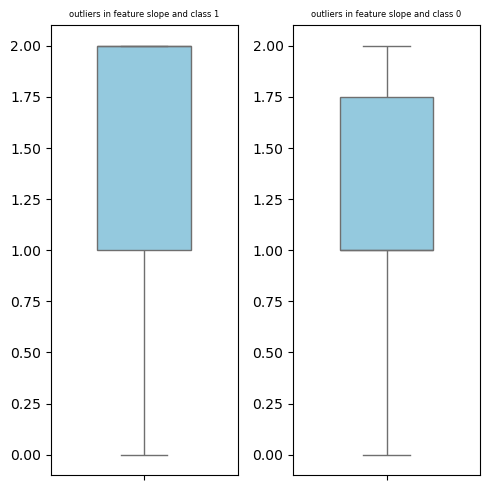

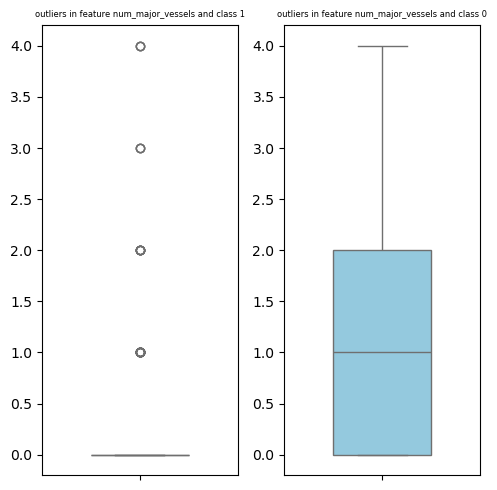

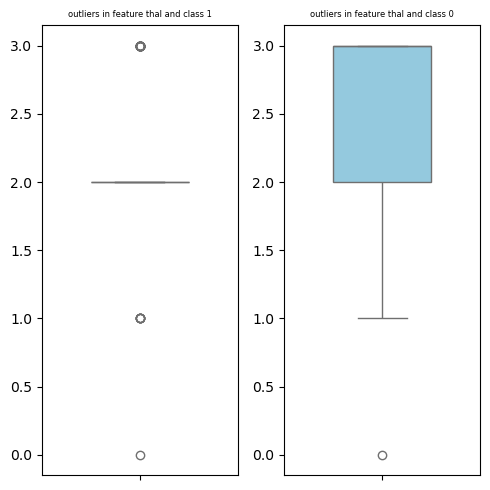

In [18]:
target_un = data.target.unique()
target_un = [i for i in target_un]



plt.figure(figsize=(5,5))
for column in columns:
    plt.figure(figsize=(5,5))
    for i in target_un:
        plt.subplot(1,2,target_un.index(i)+1) 
        sns.boxplot(data.loc[data['target']== i],y=column,color='skyblue',width=0.5)
        plt.title(f'outliers in feature {column} and class {i}', fontsize=6)
        plt.ylabel('')
    plt.tight_layout()
    plt.show()



### we have some outliers but lets use z-score to see them 
#### variables are almost normaly distributed so its okey to use z scores


In [19]:
import scipy.stats as stats

z_scores = []
for i in columns:
    z_score = stats.zscore(data[i])
    z_scores.append(z_score)
    
    


In [20]:
outliers = []
for i in range(len(columns)):
    for index,value in enumerate(z_scores[i]):
        if value > 4 :
            outliers.append([index,columns[i],value])
            
    

In [21]:
outliers

[[85, 'cholestoral', 6.145034461975383], [203, 'oldpeak', 4.447460266832533]]

In [22]:
data.iloc[85]

age                     67.0
sex                      0.0
chest_pain_type          2.0
resting_bp             115.0
cholestoral            564.0
fasting_blood_sugar      0.0
restecg                  0.0
max_hr                 160.0
exang                    0.0
oldpeak                  1.6
slope                    1.0
num_major_vessels        0.0
thal                     3.0
target                   1.0
Name: 85, dtype: float64

In [23]:
data.iloc[203]

age                     62.0
sex                      0.0
chest_pain_type          0.0
resting_bp             160.0
cholestoral            164.0
fasting_blood_sugar      0.0
restecg                  0.0
max_hr                 145.0
exang                    0.0
oldpeak                  6.2
slope                    0.0
num_major_vessels        3.0
thal                     3.0
target                   0.0
Name: 204, dtype: float64

### we have a person with cholesterol 6.14 stds away from the mean , with value = 564.0 and 
### a person with oldpeak 4.47 stds way from the mean, with value = 6.2 
### its only 2 out of 312 rows so we will drop them

In [24]:
data.drop(index=[203,85],inplace=True)

In [25]:
data.shape

(300, 14)

# correlations 

Text(0.5, 1.0, 'correlations')

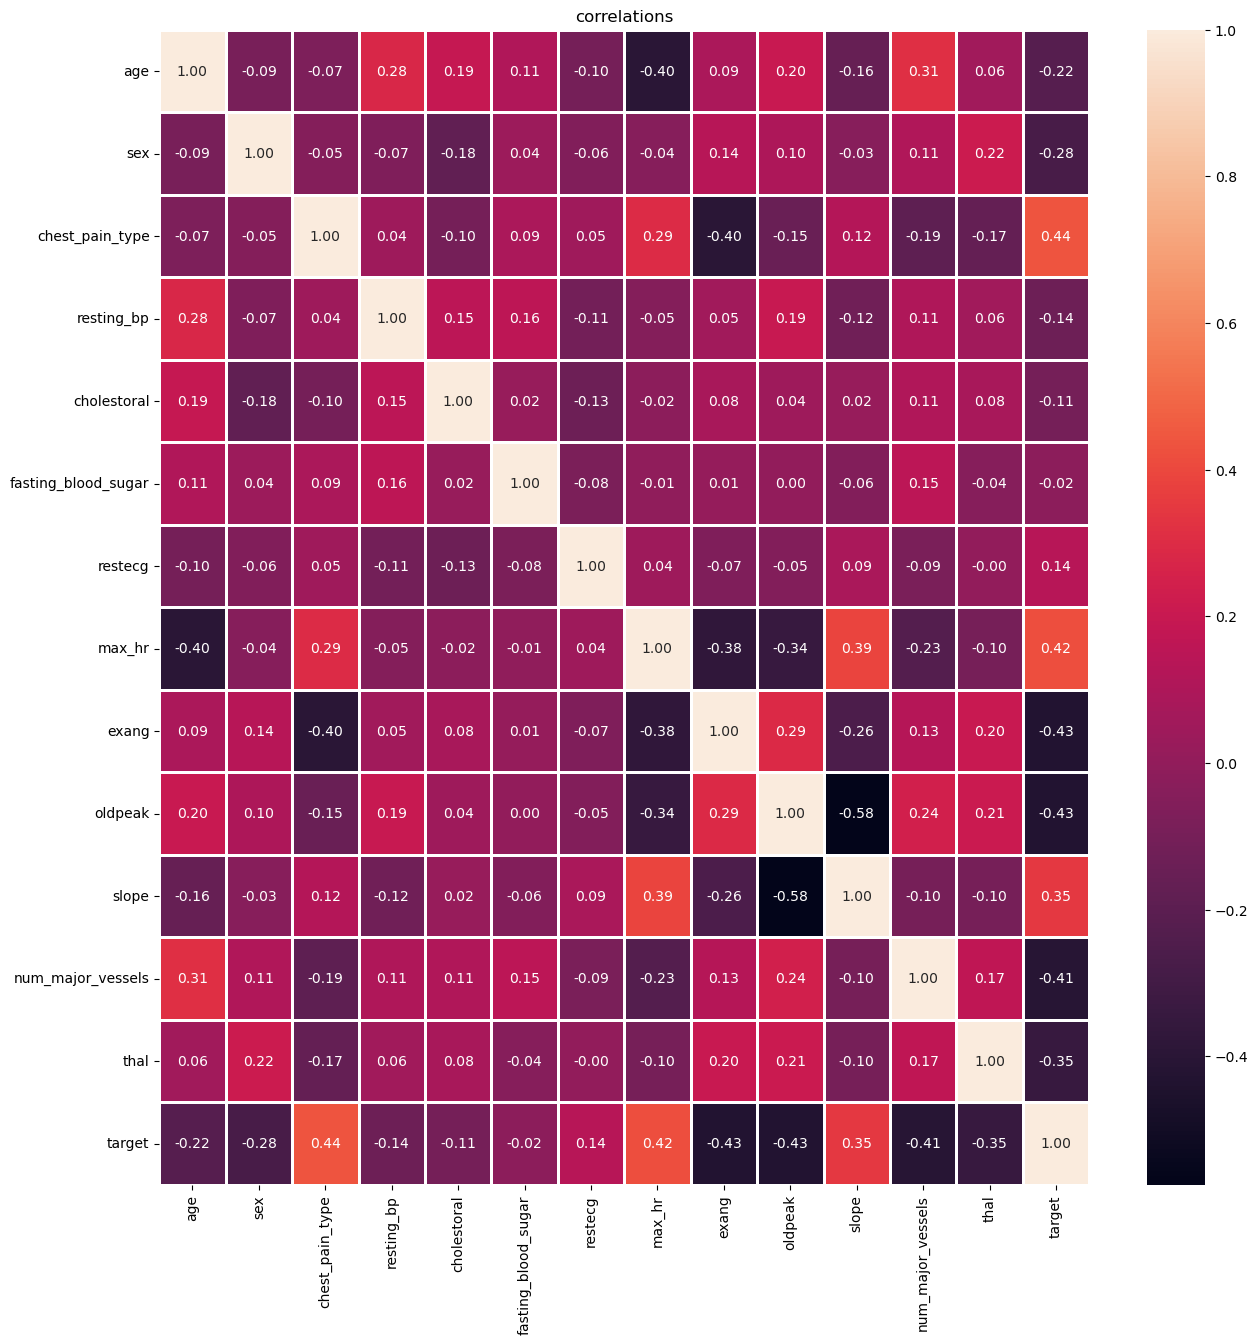

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.2f',color='skyblue',linewidths=.9)
plt.title('correlations')



### what we can see here is that mostly all of our independed variables have a good correlation with the depended one accept fasting_blood_sugar

# data preparation for predictions

## first check for multicolinearity 

In [27]:
cors = data.drop(columns=['target']).corr()

cols = cors.columns
cc = []
for i in cols:
    x = cors.loc[abs(cors[i]) > 0.8,i]
    cc.append((i , x.values[0] ,x.index[0]))

for i in cc : 
    print(f'{i[0]}  has  {i[1]}   correlation with   {i[2]}')


age  has  1.0   correlation with   age
sex  has  1.0   correlation with   sex
chest_pain_type  has  1.0   correlation with   chest_pain_type
resting_bp  has  1.0   correlation with   resting_bp
cholestoral  has  1.0   correlation with   cholestoral
fasting_blood_sugar  has  1.0   correlation with   fasting_blood_sugar
restecg  has  1.0   correlation with   restecg
max_hr  has  1.0   correlation with   max_hr
exang  has  1.0   correlation with   exang
oldpeak  has  1.0   correlation with   oldpeak
slope  has  1.0   correlation with   slope
num_major_vessels  has  1.0   correlation with   num_major_vessels
thal  has  1.0   correlation with   thal


### no correlation > 0.8 between two indepened variables so we can proceed

## split the data in train and test

In [28]:
x = data.drop(columns=['target'])
y = data['target']

In [29]:
from sklearn.model_selection import train_test_split as tt

x_train,x_test,y_train,y_test = tt(x,y,test_size=0.2)

## scale the data

In [30]:
from sklearn.preprocessing import StandardScaler as ss
scaler  = ss()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## create a metrics function to check each model performance 
## but because we are working with health data and heart desease we are looking for a beter recall and not acuracy

In [31]:
from sklearn.metrics import accuracy_score , f1_score , recall_score,precision_score,confusion_matrix 
history = []
hist_df = []

def metrics(estimator,pred,actual,hist = history,hist_df = hist_df):
    new = []
    n_df = []
    
    accuracy = accuracy_score(pred,actual)
    f1 = f1_score(pred,actual)
    recall = recall_score(pred,actual)
    precision = precision_score(pred,actual) 
    
    cm = confusion_matrix(pred,actual)
    x = cm[0][0]
    y =cm[1][0]
    
    false_negative_rate = (x/(x+y))
    
    new.append(f'{estimator} have {accuracy} accuracy , {f1} f1 score , {recall} recall {precision} precision , false negative rate{false_negative_rate}')
    print(new)
    n_df.append((estimator,accuracy,f1,recall,precision,false_negative_rate))
    history.append(new)
    hist_df.append(n_df)

    
    
    

## a function for gridsearch cv to find the best parameters for each model

In [32]:
from sklearn.model_selection import GridSearchCV

def grid(parameters , estimator, x = x_train,y = y_train):
    grid_s = GridSearchCV(estimator=estimator,param_grid=parameters,scoring='recall',cv=8,n_jobs=-1,refit=False)
    grid_s.fit(x,y)
    best_recall = grid_s.best_score_
    best_params = grid_s.best_params_
    print(f'best recall_score = {best_recall}')
    print(f'best params = {best_params}')

## DecisionTreeClassifier 

In [33]:
params = {'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,2,3,4],'min_samples_split':[1,2,3,4]}


from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()

grid(params,tree)

best recall_score = 0.8336397058823529
best params = {'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [34]:
tree = DecisionTreeClassifier(criterion='gini', max_features='sqrt', min_samples_leaf=3, min_samples_split= 4)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=4)

In [35]:
preds_tree = tree.predict(x_test)

In [36]:
metrics(tree,preds_tree,y_test)

["DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=3,\n                       min_samples_split=4) have 0.7333333333333333 accuracy , 0.7333333333333333 f1 score , 0.7586206896551724 recall 0.7096774193548387 precision , false negative rate0.7586206896551724"]



## NearestNeighbors

In [37]:
params = {'n_neighbors':[3,4,5,6,7],'algorithm':['auto','ball_tree','kd_tree','brute']}

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier()

grid(params,neighbors)

best recall_score = 0.8795955882352942
best params = {'algorithm': 'auto', 'n_neighbors': 7}


In [38]:
neighbors = KNeighborsClassifier(algorithm='auto',n_neighbors=5)
neighbors.fit(x_train,y_train)
neighbors_preds = neighbors.predict(x_test)
metrics(neighbors,neighbors_preds,y_test)

['KNeighborsClassifier() have 0.8666666666666667 accuracy , 0.875 f1 score , 0.8484848484848485 recall 0.9032258064516129 precision , false negative rate0.8275862068965517']



## RandomForestClassifier

In [39]:
params = {'n_estimators':[50,100,150],'criterion':['gini','entropy','log_loss'],'min_samples_split':[1,2,3]}

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

grid(params,forest)

best recall_score = 0.8869485294117647
best params = {'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 50}


In [40]:
forest = RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=100)
forest.fit(x_train,y_train)
forest_preds = neighbors.predict(x_test)
metrics(forest,forest_preds,y_test)

["RandomForestClassifier(criterion='entropy') have 0.8666666666666667 accuracy , 0.875 f1 score , 0.8484848484848485 recall 0.9032258064516129 precision , false negative rate0.8275862068965517"]


##  LogisticRegression

In [41]:
params = {'penalty':['l1','l2'],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky']}

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
grid(params,logistic)

best recall_score = 0.8795955882352942
best params = {'penalty': 'l2', 'solver': 'lbfgs'}


In [42]:
logistic = LogisticRegression(penalty='l1',solver='liblinear')
logistic.fit(x_train,y_train)
logistic_pred = neighbors.predict(x_test)
metrics(logistic,logistic_pred,y_test)

["LogisticRegression(penalty='l1', solver='liblinear') have 0.8666666666666667 accuracy , 0.875 f1 score , 0.8484848484848485 recall 0.9032258064516129 precision , false negative rate0.8275862068965517"]


# SVC


In [43]:
params = {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear','rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


from sklearn.svm import SVC
svm = SVC()
grid(params,svm)

best recall_score = 1.0
best params = {'C': 0.25, 'gamma': 0.4, 'kernel': 'rbf'}


In [44]:
svm = SVC(C=0.25,gamma=0.6,kernel='rbf')
svm.fit(x_train,y_train)
svm_pred = neighbors.predict(x_test)
metrics(svm,svm_pred,y_test)

['SVC(C=0.25, gamma=0.6) have 0.8666666666666667 accuracy , 0.875 f1 score , 0.8484848484848485 recall 0.9032258064516129 precision , false negative rate0.8275862068965517']


## naive_bayes

In [45]:

from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)
naive_preds = naive.predict(x_test)
metrics(naive,naive_preds,y_test)

['GaussianNB() have 0.85 accuracy , 0.8571428571428571 f1 score , 0.84375 recall 0.8709677419354839 precision , false negative rate0.8275862068965517']



## compare the models and pick the best one 

In [46]:
mm = []
for i in hist_df:
    for j in i:
        aa = []
        for k in j :
            aa.append(k)
    mm.append(aa)

In [47]:
models = pd.DataFrame(mm,columns=['model','accuracy','f1_score','recall','precision','false_negative_rate'])
models = models.sort_values('false_negative_rate',ascending=False)

In [48]:
models

,model,accuracy,f1_score,recall,precision,false_negative_rate
1,KNeighborsClassifier(),0.866667,0.875000,0.848485,0.903226,0.827586
2,"(DecisionTreeClassifier(criterion='entropy', m...",0.866667,0.875000,0.848485,0.903226,0.827586
3,"LogisticRegression(penalty='l1', solver='libli...",0.866667,0.875000,0.848485,0.903226,0.827586
4,"SVC(C=0.25, gamma=0.6)",0.866667,0.875000,0.848485,0.903226,0.827586
5,GaussianNB(),0.850000,0.857143,0.843750,0.870968,0.827586
0,"DecisionTreeClassifier(max_features='sqrt', mi...",0.733333,0.733333,0.758621,0.709677,0.758621


## DecisionTreeClassifier had the smallest false negative rate so we will pick this model

### confusion matrix: 

<Axes: >

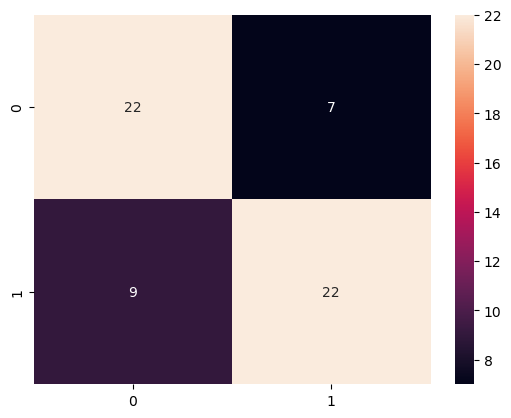

In [49]:
from sklearn.metrics import confusion_matrix  as cm

matrix = cm(y_test,preds_tree)



sns.heatmap(matrix,annot=True,color='skyblue')



## roc curve

In [50]:
from sklearn.metrics import roc_curve

In [51]:
fp, tp, thresholds = roc_curve(y_test, preds_tree)

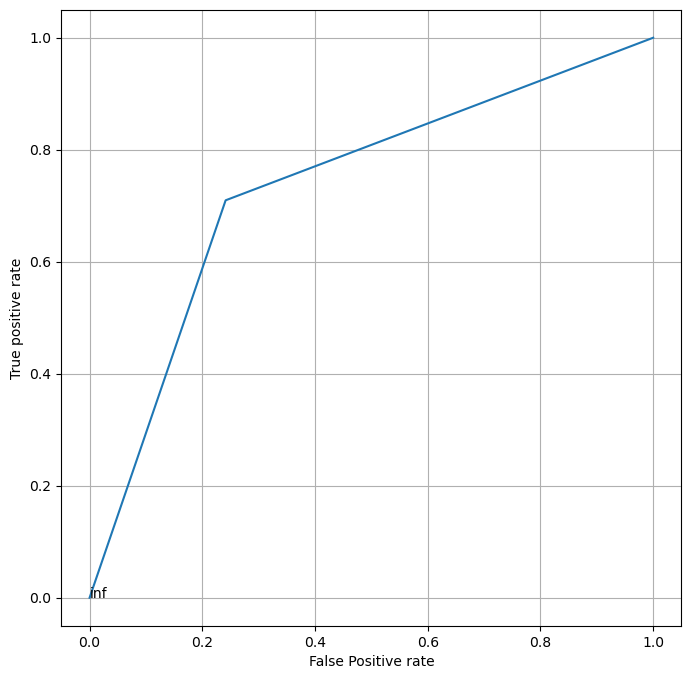

In [52]:
plt.figure(figsize=(8,8))
plt.plot(fp,tp)
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.grid()
for i in range(0,len(thresholds),60):
    plt.text(fp[i],tp[i],thresholds[i])
plt.show()

## with the following code, we will predict propabilities and the threshold whould be probability  >0.32 will be considered as true  

In [53]:
proba_preds = tree.predict_proba(x_test)


In [54]:
proba_preds

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.6       , 0.4       ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.

In [55]:
preds = []
for i in range(len(proba_preds)):

    if proba_preds[i][1] >0.32:
        preds.append(1)
    else:
        preds.append(0)
        
        

In [56]:
cm = confusion_matrix(y_test,preds)
cm

array([[20,  9],
       [ 6, 25]], dtype=int64)